# Базовые алгоритмы машинного обучения

####  Екатерина Авдеева, дата аналитик, ЦФТ, e-mail: tsukanovaeg at gmail.com

#### для ШИФТ, 28 января 2020

- линейная регрессия
- логистическая регрессия
- решающее дерево
- в конце - ссылки на материалы для более глубокого изучения

- - -
## Линейная регрессия

Базовый алгоритм машинного обучения

#### Одномерный случай (один признак)

$y = wx + w_0$

$x$ - известные числа

$y$ - целевая переменная

$w$, $w_0$ - параметры модели

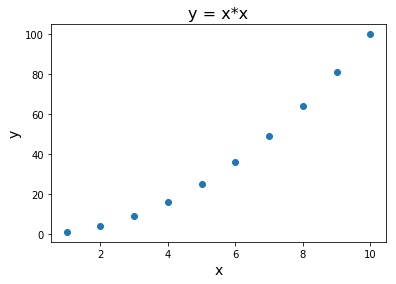

In [1]:
# Загружаем необходимые библиотеки
import matplotlib.pyplot as plt
%matplotlib inline

# Задаём данные
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

# Строим графики
out = plt.scatter(x = x, y = y)
out = plt.title('y = x*x', fontsize = 16)
out = plt.xlabel('x', fontsize = 14)
out = plt.ylabel('y', fontsize = 14)

Попробуем вот такие данные "фитировать" линейной регрессией.
- - -  
__Вопрос:__ зачем это может быть нужно? 
- - - 
Для этого разделим их на обучающую и тестовую выборки.

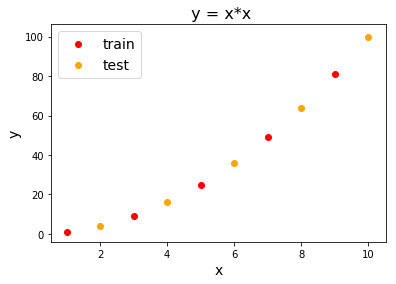

In [2]:
x_train = [1, 3,  5,  7,  9] 
y_train = [1, 9, 25, 49, 81]
x_test = [2,  4,  6,  8,  10]
y_test = [4, 16, 36, 64, 100]
out = plt.scatter(x = x_train, y = y_train, label = 'train', color = 'red')
out = plt.scatter(x = x_test, y = y_test, label = 'test', color = 'orange')
out = plt.title(' y = x*x', fontsize = 16)
out = plt.xlabel('x', fontsize = 14)
out = plt.ylabel('y', fontsize = 14)
out = plt.legend(fontsize = 14)

In [3]:
# Оформим данные как pandas DataFrame
import pandas as pd
train_df = pd.DataFrame({'x':x_train, 'y':y_train})
train_df

x   y
0  1   1
1  3   9
2  5  25
3  7  49
4  9  81

In [4]:
test_df = pd.DataFrame({'x':x_test, 'y':y_test})
test_df

x    y
0   2    4
1   4   16
2   6   36
3   8   64
4  10  100

In [5]:
# Выполним фит
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_df[['x']], train_df['y'])
# Сделаем предсказание на тестовой выборке
test_df['y_pred'] = reg.predict(test_df[['x']])
# И на обучающей выборке предсказание сделать можно
train_df['y_pred'] = reg.predict(train_df[['x']])

In [6]:
test_df

x    y  y_pred
0   2    4     3.0
1   4   16    23.0
2   6   36    43.0
3   8   64    63.0
4  10  100    83.0

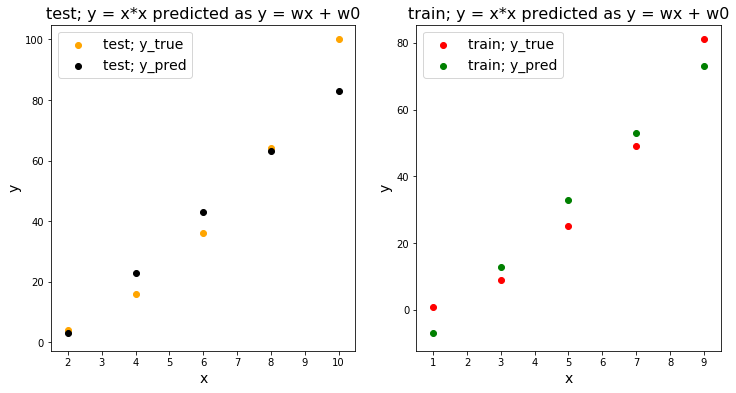

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,6))
out = ax1.scatter(x = test_df['x'], y = test_df['y'], label = 'test; y_true', color = 'orange')
out = ax1.scatter(x = test_df['x'], y = test_df['y_pred'], label = 'test; y_pred', color = 'black')
out = ax1.set_title('test; y = x*x predicted as y = wx + w0', fontsize = 16)
out = ax1.set_xlabel('x', fontsize = 14)
out = ax1.set_ylabel('y', fontsize = 14)
out = ax1.legend(fontsize = 14)
out = ax2.scatter(x = train_df['x'], y = train_df['y'], label = 'train; y_true', color = 'red')
out = ax2.scatter(x = train_df['x'], y = train_df['y_pred'], label = 'train; y_pred', color = 'green')
out = ax2.set_title('train; y = x*x predicted as y = wx + w0', fontsize = 16)
out = ax2.set_xlabel('x', fontsize = 14)
out = ax2.set_ylabel('y', fontsize = 14)
out = ax2.legend(fontsize = 14)

In [8]:
# Предскажем на новом событии
x_new = 11
reg.predict([[x_new]])

array([93.])

- - - 
__Вопрос:__ чему должно быть равно истинное значение целевой переменной для x = 11?
- - -

#### Многомерный случай (n признаков)

$y = w_1x_1 + w_2x_2 + ... + w_0$

$y = \sum_{j=1}^{n}(x_j w_j) + w_0$

Введём $x_0 = 1$, тогда

$y = \sum_{i=0}^{n}(x_j w_j)$

$x$ - известные числа

$y$ - целевая переменная

#### Функция потерь

Чтобы подобрать параметры модели ($w_i$), алгоритм минимизирует функцию потерь:

$L = \sum(y_i^{true} - y_i^{pred})^2 = \sum(y_i^{true} - \sum_j(x_{ij}w_j))^2 \rightarrow min$

Подробнее: см. ссылки на дополнительные материалы в конце ноутбука

- - -
## Логистическая регрессия

В задачах бинарной классификации целевая переменная

y = 0 или 1

- - -
__Вопрос:__ можно ли предсказывать значение такой целевой переменной линейной регрессией?
- - -

Один из способов решения - "фит" сигмоидой

$y(x) = \sigma(xw) = 1 / (1 + exp(-\sum(x_j w_j)))$ - сигмоида

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x, w):
    den = 1 + np.exp(-x*w)
    return 1.0/den

x = [0.1*i for i in range(-50, 51)]
w = 1.0
y = [sigmoid(x_i, w) for x_i in x]

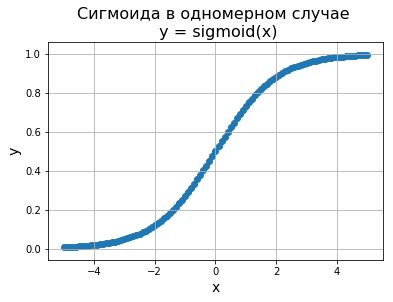

In [10]:
out = plt.scatter(x = x, y = y)
out = plt.title('Сигмоида в одномерном случае \n y = sigmoid(x)',
               fontsize = 16)
out = plt.xlabel('x', fontsize = 14)
out = plt.ylabel('y', fontsize = 14)
out = plt.grid()

Сигмоида - вероятность принадлежности объекта к классу 1

#### Функция потерь

log loss $ = - \sum (y_i ln(p_i) + (1 - y_i) ln(1 - p_i))$

### Предскажем отток

In [11]:
import pandas as pd
churn_df = pd.read_csv('../data/cft-shift-customer-retention/train.csv')

In [12]:
# Берём данные только за 1 месяц
churn_df.query('months == 11')['churn'].value_counts()

1    3950
0    2134
Name: churn, dtype: int64

In [13]:
churn_df = churn_df.query('months == 11')

- - - - - - - - - 

Возьмём несколько признаков

In [14]:
def plot_one_col(churn_df0, churn_df1, col):
    fig, ax = plt.subplots()
    val_max = churn_df[col].max()
    val_min = churn_df[col].min()
    nbins = 20
    step = (val_max - val_min)/nbins 
    bins = [(val_min + i * step) for i in range(nbins + 1)] 
    ax.hist(churn_df0[col], label = 'churn == 0', density = True, bins = bins)
    ax.hist(churn_df1[col], label = 'churn == 1', density = True, bins = bins, alpha = 0.5)
    ax.set_title(col, fontsize = 16)
    ax.set_xlabel(col + ' value', fontsize = 14)
    ax.set_ylabel('N entries per bin', fontsize = 14)
    ax.legend(fontsize = 14)

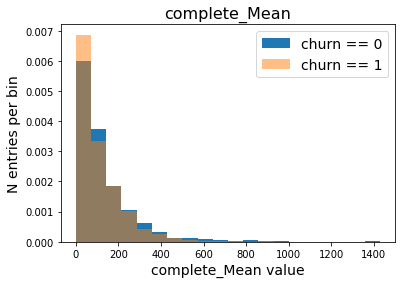

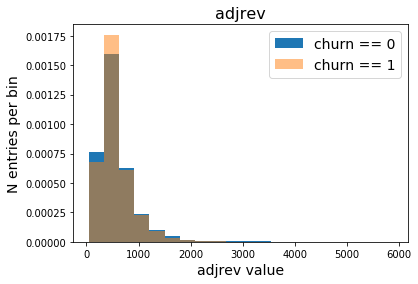

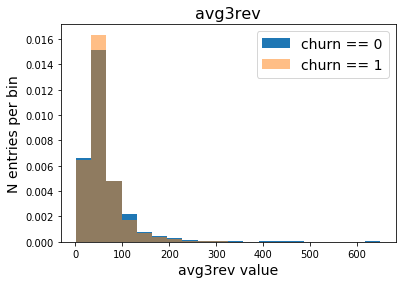

In [15]:
churn_df0 = churn_df.query('churn == 0')
churn_df1 = churn_df.query('churn == 1')
for col in ['complete_Mean', 'adjrev', 'avg3rev']:
    plot_one_col(churn_df0, churn_df1, col)

In [16]:
from sklearn.model_selection import train_test_split
train_churn_df, valid_churn_df, y_train, y_valid = train_test_split(
     churn_df, churn_df['churn'], test_size = 0.33, random_state = 42
)
train_churn_df['churn'] = y_train
valid_churn_df['churn'] = y_valid

/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
features = ['complete_Mean', 'adjrev', 'avg3rev']
target = 'churn'

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 13)

In [19]:
clf.fit(train_churn_df[features], train_churn_df[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=13, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
clf.predict_proba(valid_churn_df[features])

array([[0.33105052, 0.66894948],
       [0.29472805, 0.70527195],
       [0.30299206, 0.69700794],
       ...,
       [0.36383512, 0.63616488],
       [0.32174394, 0.67825606],
       [0.357617  , 0.642383  ]])

- - -
__Вопрос:__ почему получился двумерный массив?
- - -

In [21]:
clf.predict_proba(valid_churn_df[features])[:,1]

array([0.66894948, 0.70527195, 0.69700794, ..., 0.63616488, 0.67825606,
       0.642383  ])

In [22]:
valid_churn_df['pred_proba'] = \
    clf.predict_proba(valid_churn_df[features])[:,1]

/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


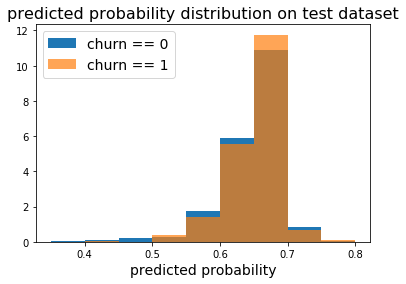

In [23]:
fig, ax = plt.subplots()
bins = [0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80]
out = ax.hist(valid_churn_df.query('churn == 0')['pred_proba'], label = 'churn == 0', bins = bins, density = True)
out = ax.hist(valid_churn_df.query('churn == 1')['pred_proba'], label = 'churn == 1', bins = bins, density = True, alpha = 0.7)
out = ax.legend(fontsize = 14)
out = ax.set_title('predicted probability distribution on test dataset', fontsize = 16)
out = ax.set_xlabel('predicted probability', fontsize = 14)

In [24]:
valid_churn_df['pred_proba'].median()

0.6592370606563404

In [25]:
threshold = valid_churn_df['pred_proba'].median()
valid_churn_df['prediction'] = clf.predict_proba(valid_churn_df[features])[:,1] > threshold

/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(valid_churn_df['churn'], valid_churn_df['prediction'])

array([[378, 326],
       [626, 678]])

In [27]:
# true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = confusion_matrix(valid_churn_df['churn'], valid_churn_df['prediction']).ravel()
tn, fp, fn, tp

(378, 326, 626, 678)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_churn_df['churn'], valid_churn_df['prediction'])

0.5258964143426295

### Что ещё?
#### Регуляризация
К функции потерь добавляется дополнительное слагаемое $\lambda \sum |w_j|^2$ или $\lambda \sum |w_j|$
#### Преобразования и масштабирование признаков

Для логистической регрессии лучше всего подходят либо признаки, имеющие Гауссовское распределение, либо бинарные. В качестве подготовки, признаки для логистической регрессии при необходимости логарифмирует, разбиваюи на бины либо преобразуют как-то ещё.

Если используется регуляризация, признаки также необходимо привести к одному масштабу, так как все коэффициенты $w_j$ должны должны иметь одинаковую размерность.

(Те же замечания применины и к линейной регрессии)

## Решающее дерево

In [29]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import matplotlib.image as mpimg

In [30]:
features

['complete_Mean', 'adjrev', 'avg3rev']

In [31]:
def train_and_plot_tree(df, features, depth):
    clf_t1 = tree.DecisionTreeClassifier(
        random_state=1001, max_depth = depth
    )
    clf_t1.fit(df[features], df['churn'])
    export_graphviz(clf_t1, out_file="tree.dot", feature_names = features)
    !dot -Tpng tree.dot -o tree.png -Gdpi=600

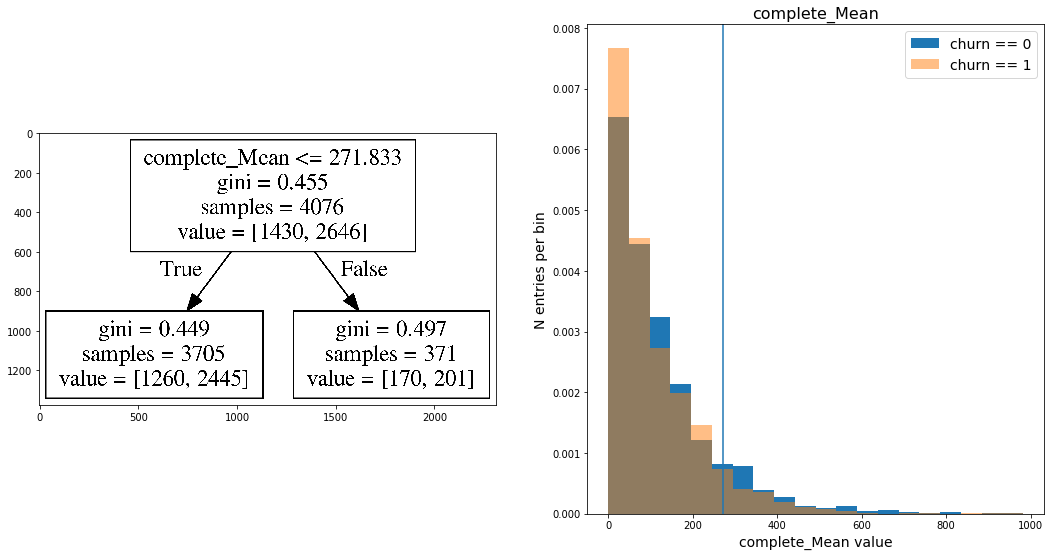

In [32]:
train_churn_df0 = train_churn_df.query('churn == 0')
train_churn_df1 = train_churn_df.query('churn == 1')

train_and_plot_tree(
    df = train_churn_df, 
    features = features, 
    depth = 1
)
Image(filename = 'tree.png')
fig, (ax1, ax2) = plt.subplots(
    ncols = 2, nrows = 1, figsize = (18, 9))
image1 = mpimg.imread('tree.png')
out = ax1.imshow(image1)

col = 'complete_Mean'

val_max = train_churn_df[col].max()
val_min = train_churn_df[col].min()
nbins = 20
step = (val_max - val_min)/nbins 
bins = [(val_min + i * step) for i in range(nbins + 1)] 
out = ax2.hist(train_churn_df0[col], label = 'churn == 0', density = True, bins = bins)
out = ax2.hist(train_churn_df1[col], label = 'churn == 1', density = True, bins = bins, alpha = 0.5)
out = ax2.set_title(col, fontsize = 16)
out = ax2.set_xlabel(col + ' value', fontsize = 14)
out = ax2.set_ylabel('N entries per bin', fontsize = 14)
out = ax2.legend(fontsize = 14)
out = ax2.axvline(x = 272)

In [33]:
N = int(0.5 * train_churn_df.shape[0])
# Первые 50% данных
df = train_churn_df.head(N)
clf_t1 = tree.DecisionTreeClassifier(
    random_state=1001, max_depth = 1
)
clf_t1.fit(df[features], df['churn'])
export_graphviz(clf_t1, out_file="tree.dot", feature_names = features)
!dot -Tpng tree.dot -o tree_first50.png -Gdpi=600
# Вторые 50% данных
df = train_churn_df.tail(N)
clf_t1 = tree.DecisionTreeClassifier(
    random_state=1001, max_depth = 1
)
clf_t1.fit(df[features], df['churn'])
export_graphviz(clf_t1, out_file="tree.dot", feature_names = features)
!dot -Tpng tree.dot -o tree_second50.png -Gdpi=600

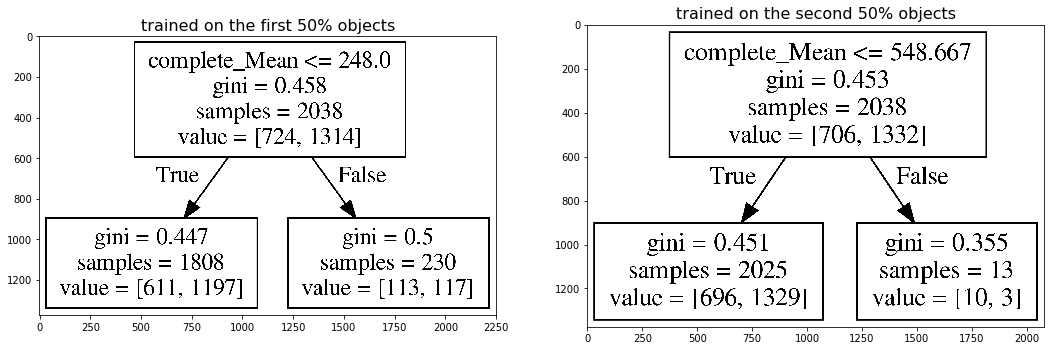

In [34]:
fig, (ax1, ax2) = plt.subplots(
    ncols = 2, nrows = 1, figsize = (18, 9))
image1 = mpimg.imread('tree_first50.png')
image2 = mpimg.imread('tree_second50.png')
out = ax1.imshow(image1)
out = ax2.imshow(image2)
out = ax1.set_title('trained on the first 50% objects', fontsize = 16)
out = ax2.set_title('trained on the second 50% objects', fontsize = 16)

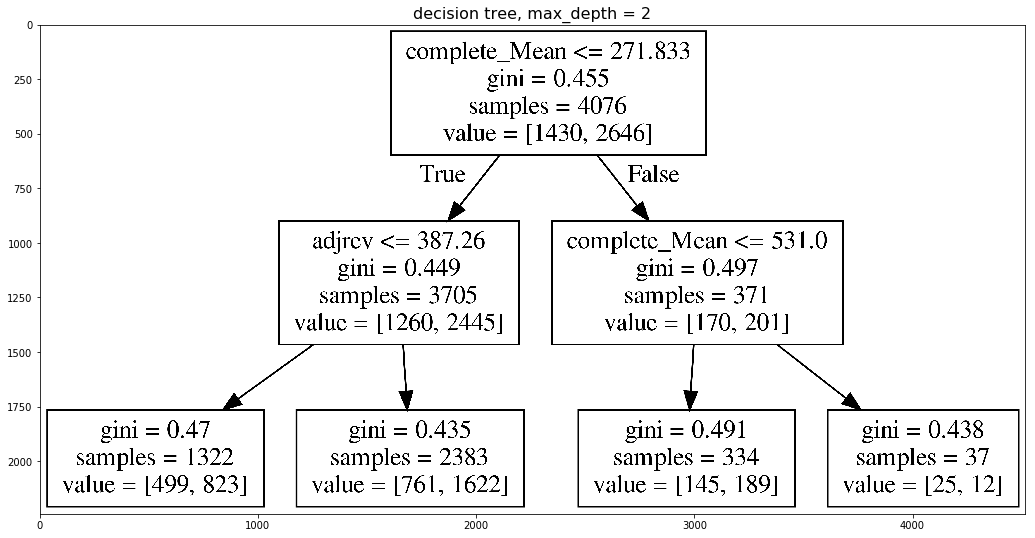

In [35]:
train_and_plot_tree(
    df = train_churn_df, features = features, 
    depth = 2
)
image = mpimg.imread('tree.png')
fig, ax = plt.subplots(figsize = (18, 9))
out = ax.imshow(image)
out = ax.set_title('decision tree, max_depth = 2', fontsize = 16)

In [36]:
train_and_plot_tree(
    df = train_churn_df, features = features, 
    depth = 4
)
Image(filename = 'tree.png')

## Материалы для более глубокого изучения
#### Теория (бесплатные материалы)
- видео на [statquests](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw) (на английском, всё объясняется очень наглядно, можно смотреть вместо сериалов), плэйлисты 
    - Linear Models 
    - Logistic Regression 
    - Machine Learning (лекции Decision Trees и тд)
- курс  на Coursera ["Введение в машинное обучение"](https://ru.coursera.org/learn/vvedenie-mashinnoe-obuchenie) от ШАД и ВШЭ (на русском, достаточно глубоко даётся теория)
-  открытый курс машинного обучения от Open Data Science  (статьи на хабре на русском языке)
    -  [Тема 3. Классификация, деревья решений и метод ближайших соседей](https://habr.com/en/company/ods/blog/322534/)
    -   [Тема 4. Линейные модели классификации и регрессии](https://habr.com/ru/company/ods/blog/323890/)
- статьи на [mlcourse.ai](https://mlcourse.ai/) (на английском)
    - Topic 3: решающие деревья    
    - Topic 4, Part 1-5: линейная и логистическая регрессия
    
#### Библиотеки python
- линейная регрессия
    - sklearn.linear_model.LinearRegression
    - sklearn.linear_model.Lasso
    - sklearn.linear_model.Ridge
    - statsmodels.regression.linear_model.OLS
    - и т.д.
- логистическая регрессия
    - sklearn.linear_model.LogisticRegression
    - statsmodels.discrete.discrete_model.Logit
- решающее дерево
    - sklearn.tree.DecisionTreeClassifier
    - sklearn.tree.DecisionTreeRegressor